This mini-project is on recognition of Handwritten Digits and the original dataset is the MNIST handwritten digit dataset, which was taken from https://www.kaggle.com/competitions/digit-recognizer, which was the part of a competition. The results are evaluated at the Kaggle website only. The goal of this project is simple -- to efficiently recognize as many handwritten digits as possible and compare the performance of various methods.

I have already used various classifiers (SVC, KNN, DT) after reduction of features per PCA as a part of curious exploration. Suprisingly, SVC classifier and KNN with five neighbors both worked fairly well, with 98.03% and 97.27% respectively. As we shall see, these accuracies are not bad. However, we will push the accuracy to over 99% using Convolutional Neural Networks (CNN). This will be implemented using Tensorflow's keras.Sequential API. 

Table of Contents

1. Import Libraries and Data

2. Preprocessing of the data

3. a. Defining the CNN model with 'adam' optimizer. 

   b. Training the model. 
   
   c. Evaluating the model. 
   
   c. Predicting using the model. 

4. Doing the same steps as (3) but with 'RMSprop' optimizer. 

5. Conclusion

# 1. Loading libraries and importing data

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from matplotlib import pyplot as plt

In [29]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [30]:
print(train.shape, test.shape) # as per kaggle website, the training data's first column is the label of the image

(42000, 785) (28000, 784)


# Preprocessing the data

In [31]:
# images generally do not have missing data, but checking to make sure, since the data is directly taken from csv file

print(train.isnull().sum().sum(), test.isnull().sum().sum())

0 0


In [32]:
# Splitting into x_train, y_train and x_test for following use

y_train = train.iloc[:,0].values # the first column is the digit label

x_train = train.iloc[:,1:].values # rest of the columns are the pixels of the image

x_test = test.iloc[:,:].values # recall, the test is entirely data and label is to be predicted

In [33]:
# reshaping the data into a tensor for use in the CNN model

x_train = x_train.reshape(-1, 28, 28, 1) 
x_test = x_test.reshape(-1, 28, 28, 1)

# Setting up the CNN model using keras 

In [34]:
tf.random.set_seed(41)

modell = keras.Sequential()   # use the Sequential API to instantiate a model

modell.add(Input(shape=(28, 28, 1)))  # The input into the model is a (28 by 28) image matrix

# a convolution kernel that is convolved with the layer input
modell.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu", padding='same')) 

# normalize the input after convolution to be fed into the next layer
modell.add(BatchNormalization())

modell.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu", padding='same'))
modell.add(BatchNormalization())

# after the input layer, we use MaxPooling for downsampling by a factor of 3
modell.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# adding dropout to avoid overfitting, 20% dropout rate
modell.add(Dropout(rate=0.20))

modell.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'))
modell.add(BatchNormalization())

modell.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'))
modell.add(BatchNormalization())
modell.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
modell.add(Dropout(rate=0.20))

modell.add(Conv2D(filters=64, kernel_size=(2,2), activation="relu", padding='same'))
modell.add(BatchNormalization())

modell.add(Conv2D(filters=64, kernel_size=(2, 2), activation="relu", padding='same'))
modell.add(BatchNormalization())
modell.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
modell.add(Dropout(rate=0.20))

# defining a CNN model with 192, 91, 64 noded three consecutive dense layers, with output layer (10 nodes since 10 digits need

# need to be identified)

modell.add(Flatten())

modell.add(Dense(units=192, activation="relu")) 
modell.add(BatchNormalization())
modell.add(Dropout(rate=0.20))

modell.add(Dense(units=91, activation="relu"))
modell.add(BatchNormalization())
modell.add(Dropout(rate=0.20))

modell.add(Dense(units=64, activation="relu"))
modell.add(BatchNormalization())
modell.add(Dropout(rate=0.20))

modell.add(Dense(units=10, activation="softmax")) # softmax activation primarily because of multi-class classification

In [35]:
modell.summary()  # Summarizing the model

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 6, 6, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 6, 6, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 192)            │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 348,689 (1.33 MB)

 Trainable params: 347,227 (1.32 MB)

 Non-trainable params: 1,462 (5.71 KB)

In [36]:
# Compiling the model with three metrics Precision, Recall and Accuracy 

# Using 'sparse_categorical_crossentroy' as loss function and 'adam' optimizer

modell.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
x_train = x_train/255  # normalizing the input 

In [39]:
# training the model with six repetitions and 10% of training data used for validation to see if overfitting happening

history = modell.fit(x_train, y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 349s 295ms/step - accuracy: 0.9428 - loss: 0.1990 - val_accuracy: 0.9774 - val_loss: 0.0663
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 319s 270ms/step - accuracy: 0.9668 - loss: 0.1099 - val_accuracy: 0.9850 - val_loss: 0.0531
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 311s 263ms/step - accuracy: 0.9764 - loss: 0.0825 - val_accuracy: 0.9831 - val_loss: 0.0624
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 316s 267ms/step - accuracy: 0.9803 - loss: 0.0691 - val_accuracy: 0.9807 - val_loss: 0.0718
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 330s 279ms/step - accuracy: 0.9809 - loss: 0.0640 - val_accuracy: 0.9817 - val_loss: 0.0641
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 371s 314ms/step - accuracy: 0.9848 - loss: 0.0569 - val_accuracy: 0.9862 - val_loss: 0.0476
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 330s 279ms/step - accuracy: 0.9856 - loss: 0.0517 - val_accuracy: 0.9836 - val_loss: 0.0586
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 315s 266ms/step - ac

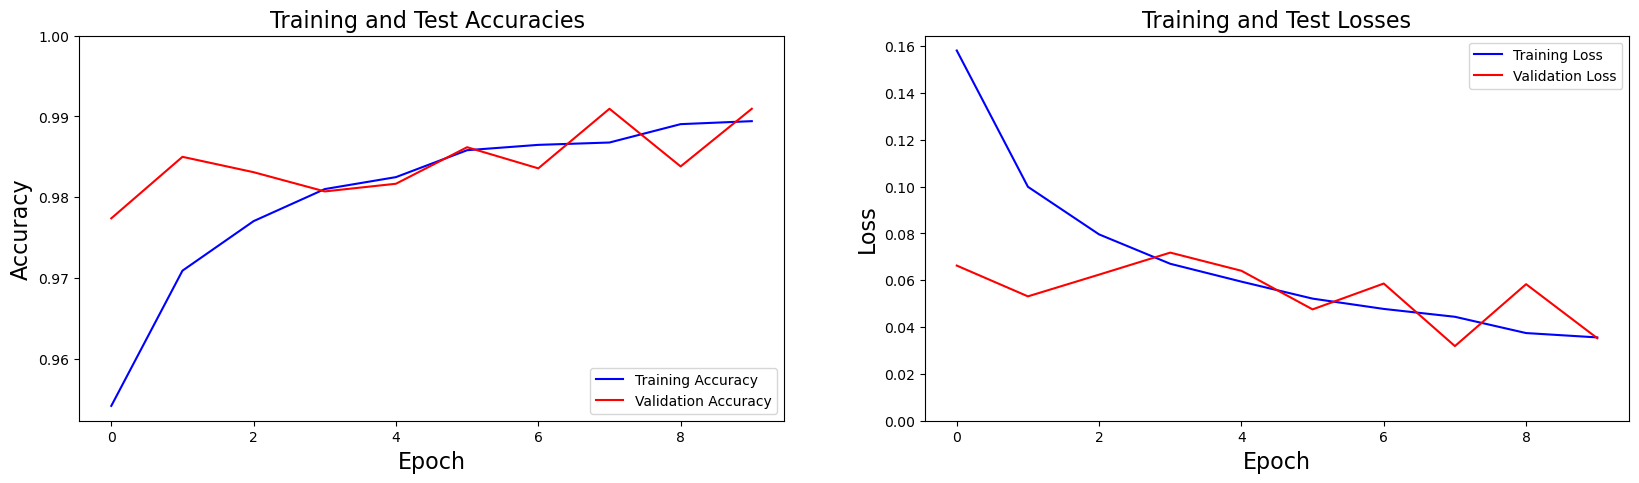

In [45]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], color="b", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title("Training and Test Accuracies ", fontsize=16)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_loss"], color="r", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title("Training and Test Losses", fontsize=16)

plt.show()

In [46]:
x_test = x_test.reshape(-1, 28, 28, 1)

In [47]:
x_test = x_test/255
predicted_label = modell.predict(x_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 63s 72ms/step


In [48]:
predicted_label.shape

(28000, 10)

In [49]:
df_predicted = pd.DataFrame(predicted_label)

In [50]:
df_predicted.head(10)

,0,1,2,3,4,5,6,7,8,9
0,2.346882e-07,6.227837e-08,9.999963e-01,4.017024e-07,5.145163e-07,7.070924e-09,3.833779e-08,1.348723e-06,7.399073e-07,4.099919e-07
1,9.999771e-01,3.804880e-08,3.090307e-07,1.363458e-07,1.156344e-07,9.967527e-06,4.693093e-06,1.907843e-07,6.936497e-06,5.148324e-07
2,1.136564e-06,2.820548e-07,6.499030e-07,1.832799e-06,4.213460e-05,1.865519e-07,3.004311e-07,6.232237e-06,7.390675e-06,9.999398e-01
3,9.566200e-01,1.040496e-05,2.994309e-04,1.318479e-05,2.328595e-04,1.039856e-04,1.592216e-04,2.399721e-04,3.319046e-03,3.900185e-02
4,5.181849e-06,5.085712e-05,6.030624e-04,9.991873e-01,2.882118e-06,6.420910e-05,9.123920e-06,1.220237e-05,5.666476e-05,8.517392e-06
5,3.551653e-07,2.400040e-05,2.150029e-04,4.454499e-05,8.995856e-05,5.810309e-07,1.787823e-06,9.992940e-01,1.038823e-05,3.192768e-04
6,9.999906e-01,1.126211e-06,3.203886e-07,1.520232e-06,3.328247e-06,6.983056e-07,4.238391e-07,1.582508e-07,7.016601e-07,1.097115e-06
7,6.905725e-06,9.486155e-05,1.667319e-04,9.995060e-01,2.357763e-06,1.767374e-04,2.279263e-06,2.662977e-05,6.004320e-06,1.154757e-05
8,9.999825e-01,1.740889e-07,5.875987e-07,8.628833e-07,1.173105e-06,2.100704e-06,5.252246e-06,2.572758e-07,4.663199e-06,2.431124e-06
9,1.791794e-06,1.412016e-05,4.136459e-05,9.998721e-01,1.162626e-06,2.818316e-05,2.745473e-06,4.468274e-06,2.732070e-05,6.861970e-06


In [51]:
df_predicted_labels = np.argmax(df_predicted, axis = 1)

In [52]:
df_predicted_labels

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [53]:
submission = pd.DataFrame({'ImageId': range(1, len(df_predicted_labels) + 1), 'Label': df_predicted_labels })

In [54]:
submission.head(8)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3


In [60]:
submission.to_csv("MNIST_Deep_Learning_I_adam.csv", index=None)

# submitted to Kaggle and accuracy is 98.985%, which is the best so far

# Now using the similar model with RMSprop optimizer

In [55]:
tf.random.set_seed(31)

In [56]:
model = keras.Sequential()

model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu", padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(rate=0.20))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(rate=0.20))

model.add(Conv2D(filters=64, kernel_size=(2,2), activation="relu", padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(2, 2), activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.20))

model.add(Flatten())

model.add(Dense(units=192, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.20))

model.add(Dense(units=91, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.20))

model.add(Dense(units=64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.20))

model.add(Dense(units=10, activation="softmax"))

In [57]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 6, 6, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 192)            │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 348,689 (1.33 MB)

 Trainable params: 347,227 (1.32 MB)

 Non-trainable params: 1,462 (5.71 KB)

In [58]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

In [59]:
history2 = model.fit(x_train, y_train, epochs = 6, validation_split = 0.1)

Epoch 1/6
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 379s 314ms/step - accuracy: 0.7534 - loss: 0.7771 - val_accuracy: 0.9736 - val_loss: 0.0914
Epoch 2/6
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 359s 304ms/step - accuracy: 0.9702 - loss: 0.1084 - val_accuracy: 0.9876 - val_loss: 0.0416
Epoch 3/6
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 359s 285ms/step - accuracy: 0.9809 - loss: 0.0727 - val_accuracy: 0.9907 - val_loss: 0.0305
Epoch 4/6
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 364s 308ms/step - accuracy: 0.9836 - loss: 0.0599 - val_accuracy: 0.9905 - val_loss: 0.0311
Epoch 5/6
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 358s 303ms/step - accuracy: 0.9854 - loss: 0.0506 - val_accuracy: 0.9850 - val_loss: 0.0487
Epoch 6/6
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 331s 280ms/step - accuracy: 0.9866 - loss: 0.0473 - val_accuracy: 0.9898 - val_loss: 0.0392


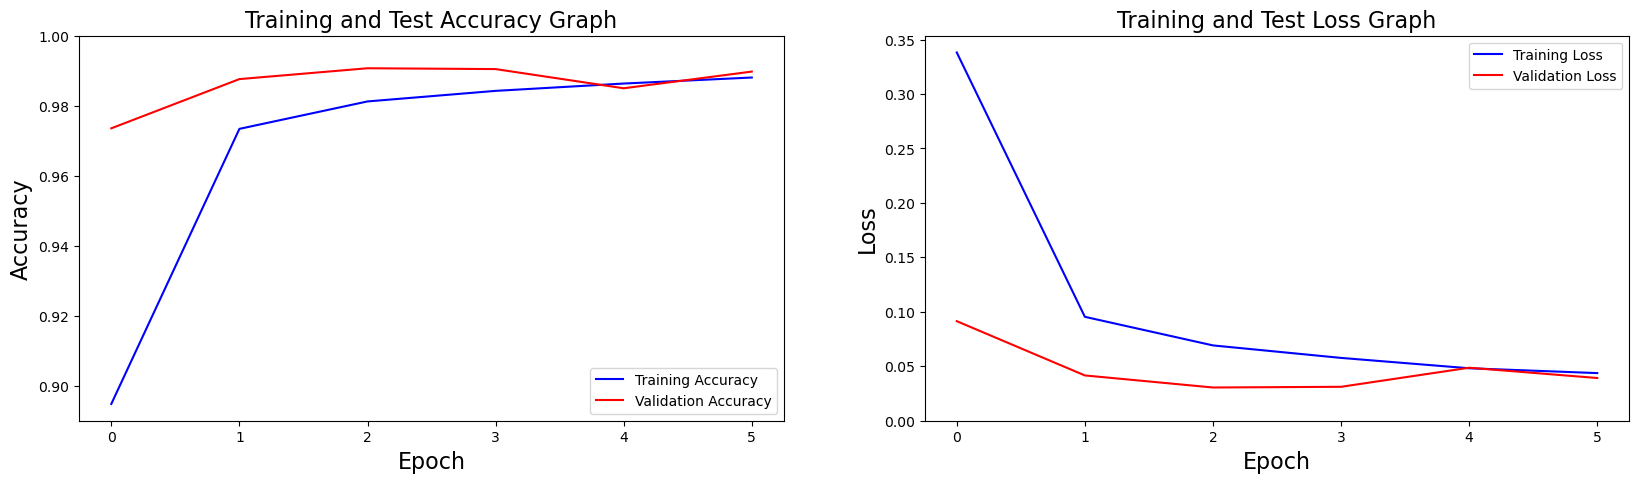

In [62]:
plt.figure(figsize=(20, 5))

#plotting the respective accuracies 

plt.subplot(1,2,1)
plt.plot(history2.history["accuracy"], color="b", label="Training Accuracy")
plt.plot(history2.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title("Training and Test Accuracy Graph", fontsize=16)

# plotting the respective losses
plt.subplot(1,2,2)
plt.plot(history2.history["loss"], color="b", label="Training Loss")
plt.plot(history2.history["val_loss"], color="r", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title("Training and Test Loss Graph", fontsize=16)
plt.show()

In [63]:
y_2 = model.predict(x_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 71s 81ms/step


In [64]:
df_predicted_2 = pd.DataFrame(y_2)

In [65]:
df_predicted_labels_2 = np.argmax(df_predicted_2, axis = 1)

In [66]:
df_predicted_labels_2

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [67]:
submission_2 = pd.DataFrame({'ImageId': range(1, len(df_predicted_labels_2) + 1), 'Label': df_predicted_labels_2 })

In [68]:
submission_2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [69]:
submission_2.to_csv('MNIST_Deep_Learning_II_RMSprop.csv', index = None)


# This time the accuracy was 99.14%

# Convolutional Neural Network is quite effficient for digit recognition in this type of data-set consisting of digits, as we see from high accuracy. 

Sadly, it took a while to run 10 and 6 epochs (resp) on my machine that hardly has any computing capacity; for instance, each epoch took about 7 to 8 minutes. I suspect that this accuracy can be improved even further with slightly more epochs, if I had a better machine. 